# DATA CLEANING
### Fraud Detection System Development using Deep Neural Network for Reported Transactional Data

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

#### Import Raw CSV File with filtered data source

In [19]:
df = pd.read_csv('user_data_train_feature_creator.csv', sep=';')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40717 entries, 0 to 40716
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   uid                                           40717 non-null  object 
 1   is_scammer                                    40717 non-null  int64  
 2   source                                        40717 non-null  object 
 3   trx_date                                      40717 non-null  object 
 4   report_date                                   40717 non-null  object 
 5   registereddate                                40717 non-null  object 
 6   birthday                                      40717 non-null  object 
 7   gender                                        35380 non-null  object 
 8   job_position                                  40717 non-null  object 
 9   is_verified                                   40717 non-null 

In [12]:
df.head()

,uid,is_scammer,source,trx_date,report_date,registereddate,birthday,gender,job_position,is_verified,...,centrality_outdegree_p2p,centrality_indegree_p2p,centrality_undirected_p2p,centrality_outdegree_sendmoney,account_lifetime,age,count_trx_per_lifetime,max_gmt_pay_diff_days_per_lifetime,freq_x2x_per_lifetime,dormancy_max_gmt_pay_diff_days_per_count_trx
0,a4377cf6-8fe3-408f-b438-534671da6ed1,0,CS_REPORT_VICTIM,2/8/2021,2/20/2021,3/1/2019,7/1/1938,Female,MENGURUS RUMAH TANGGA,1,...,0.00,0.000000e+00,0.000000e+00,0.000000e+00,710,85,0.807042,5.971831,0.770423,7.399651
1,b5c4d8ab-5d0e-483e-8c74-968e90efd07f,1,INCOMPLETE_CS_REPORT_SCAMMER,1/17/2023,1/17/2023,10/1/2022,7/1/1945,Male,PETANI / PEKEBUN,1,...,70674374.89,1.413487e+08,2.120231e+08,3.265201e+08,108,78,0.212963,3.981481,0.148148,18.695652
2,36a93fc1-b26c-4d34-be3e-404d233b1cbe,1,CS_REPORT_SCAMMER,12/21/2022,1/3/2023,1/1/2020,8/1/1945,Male,PETANI / PEKEBUN,1,...,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1085,78,0.052535,0.857143,0.022120,16.315789
3,88296630-c0b9-46eb-b41c-829edc38a101,1,INCOMPLETE_CS_REPORT_SCAMMER,3/3/2023,3/3/2023,8/1/2021,10/1/1947,Female,MENGURUS RUMAH TANGGA,1,...,0.00,3.512516e+10,3.512516e+10,6.530402e+05,579,76,0.203800,1.191710,0.167530,5.847458
4,b91c38fe-3061-409a-9a28-dff26a4587a4,1,CS_REPORT_SCAMMER,12/3/2022,12/4/2022,9/1/2022,7/1/1949,Female,MENGURUS RUMAH TANGGA,1,...,0.00,0.000000e+00,0.000000e+00,0.000000e+00,93,74,0.838710,3.225806,0.634409,3.846154


In [34]:
# train-test separation
# df_shuffled = df.sample(frac = 1, random_state = 1)
# df_test = df_shuffled[:int(len(df_shuffled) * 0.05)]
# df_test.to_csv("user_data_test.csv", sep=';')
# df_train = df_shuffled[int(len(df_shuffled) * 0.05):]
# df_train.to_csv("user_data_train.csv", sep=';')

In [24]:
df4.info()

NameError: name 'df4' is not defined

#### Begin Cleaning Here

In [36]:
# Drop uid column
# df = df.rename(columns={"Unnamed: 0": "id"})
# df1 = df.drop(columns=['uid', 'id'])

In [21]:
df1 = df.copy()

In [22]:
# One-hot Encoding for df['source']
df1['source'].value_counts()

source
CS_REPORT_SCAMMER               11919
CS_REPORT_VICTIM                10819
INCOMPLETE_CS_REPORT_VICTIM      9848
INCOMPLETE_CS_REPORT_SCAMMER     8131
Name: count, dtype: int64

In [20]:
now = np.datetime64('2023-06-07T11:21:19')

In [21]:
# df['trx_date'] change to integer
df1['trx_date'] = pd.to_datetime(df1['trx_date'], format="%m/%d/%Y")
df1['trx_date'] = (now - df1['trx_date']).dt.days

# df['report_date'] change to integer
df1['report_date'] = pd.to_datetime(df1['report_date'], format="%m/%d/%Y")
df1['report_date'] = (now - df1['report_date']).dt.days

# df['registereddate'] null to np.datetime64('1970')
# df['registereddate'] change to integer
df1['registereddate'] = pd.to_datetime(df1['registereddate'], format="%m/%d/%Y")
df1['registereddate'] = (now - df1['registereddate']).dt.days

# Handle corrupt birthday data '#'*256 to np.nan
# Commented: Make new feature 'birthday_valid' value 1 when 'birthday' is not nan, else 0
# df['birthday'] null to median/mean value
# df['birthday'] change to integer

# Done in Excel
# df1['birthday'] = df1['birthday'].replace('#'*255, np.nan)
# df1['birthday'] = df1['birthday'].fillna(np.datetime64('0000'))

# df1.loc[df1['birthday'].notnull(), 'birthday_valid'] = 1
# df1.loc[df1['birthday'].isnull(), 'birthday_valid'] = 0

df1['birthday'] = pd.to_datetime(df1['birthday'], format="%m/%d/%Y")
df1['birthday'] = (now - df1['birthday']).dt.days

In [22]:
# df['gender'] null to 'Null'

# Done in Excel
# df1['gender'] = df1['gender'].fillna('Null')

In [23]:
# df['dormancy_max_gmt_pay_diff_days'] null --> 0
# df['dormancy_mean_gmt_pay_diff_days'] null --> 0
df1['dormancy_max_gmt_pay_diff_days'] = df1['dormancy_max_gmt_pay_diff_days'].fillna(0)
df1['dormancy_mean_gmt_pay_diff_days'] = df1['dormancy_mean_gmt_pay_diff_days'].fillna(0)

In [24]:
# df['kyc_total_failed'] null --> 0
# df['kyc_total_revoked'] null --> 0
df1['kyc_total_failed'] = df1['kyc_total_failed'].fillna(0)
df1['kyc_total_revoked'] = df1['kyc_total_revoked'].fillna(0)

In [25]:
# fill feature created null na values
df1['max_gmt_pay_diff_days_per_lifetime'] = df1['max_gmt_pay_diff_days_per_lifetime'].fillna(0)
df1['dormancy_max_gmt_pay_diff_days_per_count_trx'] = df1['dormancy_max_gmt_pay_diff_days_per_count_trx'].fillna(0)

In [23]:
# df['job_position'] perbaiki typo
# df['job_position'] null --> 'LAINNYA'
# df['job_position'] kelompokkan menjadi RumahTangga, Pelajar, TidakBekerja, Wiraswasta, Spesialis, Karyawan, PegawaiNS, Lainnya
# 159 --> 8 Unique job entries
df2 = df1.copy()

In [24]:
# Done in Excel
# df2['job_position'] = df2['job_position'].fillna('LAINNYA')

df2['job_position'] = df2['job_position'].str.replace(" ", "")
df2['job_position'] = df2['job_position'].str.replace("/", "")

karyawan = [r'(.*(?:KARYAWAN).*)', r'(.*(?:BURUH).*)', 'PILOT', 'PELAUT', 'PETANIPEKEBUN', 'PETERNAK', 'NELAYANPERIKANAN', 'SOPIR', 'AKUNTAN', 'TRANSPORTASI', 'PENATARIAS', 'PENATARAMBUT', 'PENATABUSANA', 'PENGEMUDI', 'PENYIARTELEVISI', 'PENYIARRADIO']
tidak_kerja = [r'(.*(?:TIDAK).*)', r'(.*(?:BELUM).*)', 'PENSIUNAN', 'PENSIUN']
pelajar = [r'(.*(?:PELAJAR).*)']
wiraswasta = [r'(.*(?:SWASTA).*)', r'(.*(?:WIRA).*)', 'PERDAGANGAN', 'INDUSTRI', 'KONSTRUKSI', 'PEDAGANG', 'WIASRWASTA']
spesialis = [r'(.*(?:TUKANG).*)', 'GURU', 'DOSEN', 'BIDAN', 'DOKTER', 'WARTAWAN', 'APOTEKER', 'PERAWAT', 'PENGACARA', 'PENELITI', 'PARAJI', 'KONSULTAN', 'PERANCANGBUSANA', 'HAKIM', 'ARSITEK', 'PENTERJEMAH', 'JURUMASAK', 'MEKANIK', 'NOTARIS']
pns = [r'(.*(?:BUMN).*)', r'(.*(?:BUMD).*)', r'(.*(?:ANGGOTA).*)', 'PERANGKATDESA', 'PEGAWAINEGERISIPIL', 'KEPOLISIANRI', 'GUBERNUR', 'TENTARANASIONALINDONESIA', 'KEPALADESA', 'WALIKOTA', 'BUPATI', 'DUTABESAR']
rumahtangga = [r'(.*(?:RUMAH).*)']
lainnya = [r'(.*(?:LAIN).*)', r'^[A-Z0-9]{0,3}$', 'SENIMAN', 'TABIB', 'USTADZMUBALIGH', 'OHTERS', 'OTHERS', 'PASTUR', 'PARANORMAL', 'PIALANG', 'IMAMMASJID', 'PENDETA', 'BIARAWATI']

df2['job_position'] = df2['job_position'].replace(lainnya, 'LAINNYA', regex = True)
df2['job_position'] = df2['job_position'].replace(pns, 'PEGAWAI_NS', regex = True)
df2['job_position'] = df2['job_position'].replace(pelajar, 'PELAJAR', regex = True)
df2['job_position'] = df2['job_position'].replace(karyawan, 'KARYAWAN', regex = True)
df2['job_position'] = df2['job_position'].replace(wiraswasta, 'WIRASWASTA', regex = True)
df2['job_position'] = df2['job_position'].replace(spesialis, 'SPESIALIS', regex = True)
df2['job_position'] = df2['job_position'].replace(rumahtangga, 'RUMAH_TANGGA', regex = True)
df2['job_position'] = df2['job_position'].replace(tidak_kerja, 'TIDAK_KERJA', regex = True)

In [25]:
print(df2['job_position'].value_counts())
print("Unique Job Positions: ", len(df2['job_position'].unique()))

job_position
PELAJAR         15999
LAINNYA          5932
KARYAWAN         5852
RUMAH_TANGGA     5162
TIDAK_KERJA      4338
WIRASWASTA       2929
PEGAWAI_NS        280
SPESIALIS         225
Name: count, dtype: int64
Unique Job Positions:  8


#### Display Relational HeatMap of Cleaned Data

In [34]:
df3 = df2.copy()
categorical_columns = ['source','gender','job_position']
df3 = pd.get_dummies(df3, columns = categorical_columns)

In [30]:
# Check Correlation of Features, then Make Relational Map
# corr_column = df3.select_dtypes(include=[np.number]).columns.to_list()

# fig = plt.figure(figsize=(60,40))
# ax = fig.add_subplot(1, 1, 1)
# ax.set_title('Correlation Between Features')

# mask = np.triu(np.ones_like(
#     df3[corr_column].corr(), dtype=np.bool))

# sns.heatmap(df3[corr_column].corr(),
#             vmin=-1, vmax=1, cmap='vlag', annot=True, fmt='.3f', mask=mask,
#             annot_kws = {'fontsize': 10, 'fontweight':'roman'},
#             square=True)

# plt.show()

In [31]:
# Another Visual Representation
# score_corr = df3[corr_column].corr()
# score_corr.style.background_gradient(cmap='vlag')

In [36]:
df4.head(5)

,uid,is_scammer,trx_date,report_date,registereddate,birthday,is_verified,aqc_freq_prepaid_mobile,aqc_mean_prepaid_mobile_amount,aqc_freq_topup,...,gender_Female,gender_Male,job_position_KARYAWAN,job_position_LAINNYA,job_position_PEGAWAI_NS,job_position_PELAJAR,job_position_RUMAH_TANGGA,job_position_SPESIALIS,job_position_TIDAK_KERJA,job_position_WIRASWASTA
0,a4377cf6-8fe3-408f-b438-534671da6ed1,0,849,837,1559,31022,1,273,4.820000e+15,407,...,True,False,False,False,False,False,True,False,False,False
1,b5c4d8ab-5d0e-483e-8c74-968e90efd07f,1,141,141,249,28465,1,0,0.000000e+00,16,...,False,True,True,False,False,False,False,False,False,False
2,36a93fc1-b26c-4d34-be3e-404d233b1cbe,1,168,155,1253,28434,1,2,2.070000e+14,23,...,False,True,True,False,False,False,False,False,False,False
3,88296630-c0b9-46eb-b41c-829edc38a101,1,96,96,675,27643,1,0,0.000000e+00,11,...,True,False,False,False,False,False,True,False,False,False
4,b91c38fe-3061-409a-9a28-dff26a4587a4,1,186,185,279,27004,1,0,0.000000e+00,33,...,True,False,False,False,False,False,True,False,False,False


#### Re-Add uid Column, Save as CSV.
##### Uncomment to run

In [35]:
df4 = df3.drop(columns=['source_CS_REPORT_SCAMMER',
                        'source_CS_REPORT_VICTIM', 
                        'source_INCOMPLETE_CS_REPORT_SCAMMER', 
                        'source_INCOMPLETE_CS_REPORT_VICTIM'
                       ])
# df4['uid'] = df['uid']
df4.to_csv("user_data_test_clean_feat_create.csv", index=False, sep=';')

In [4]:
df_coba = pd.read_csv("user_data_dropped.csv", sep=';')

([<matplotlib.patches.Wedge at 0x1ff31c8dc90>,
 [Text(0.363266167440775, 1.0382859392252652, 'PELAJAR / MAHASISWA'),
  Text(-1.0685902424343776, 0.26098830198696266, 'LAINNYA'),
  Text(-0.9136775528716283, -0.6125302681325332, 'MENGURUS RUMAH TANGGA'),
  Text(-0.2727605630444013, -1.0656461304052585, 'BELUM / TIDAK BEKERJA'),
  Text(0.3779938127706756, -1.0330153326582754, 'KARYAWAN SWASTA'),
  Text(0.8080838044158861, -0.7463247048307782, 'WIRASWASTA'),
  Text(0.9934571227446286, -0.47227422676657255, 'BURUH HARIAN LEPAS'),
  Text(1.0546958085688813, -0.3124367958279463, 'PETANI / PEKEBUN'),
  Text(1.0748650707736431, -0.23380564499338186, 'PEDAGANG'),
  Text(1.0805995997886404, -0.20568058959617583, 'PEGAWAI NEGERI SIPIL'),
  Text(1.0849673932496626, -0.1812339802162717, '13'),
  Text(1.0883882995144207, -0.15940799691391885, 'BURUH TANI / PERKEBUNAN'),
  Text(1.0911470019118423, -0.13927749358312716, 'KARYAWAN HONORER'),
  Text(1.0933221952608407, -0.12102304470643742, 'GURU'),
  Te

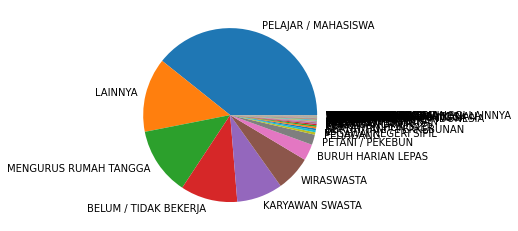

In [32]:
plt.pie(df_coba['job_position'].value_counts(), labels=df_coba['job_position'].value_counts().keys())

In [15]:
df_clean = pd.read_csv("user_data_test_clean_feat_create.csv", sep=';')

In [33]:
df_coba['job_position'].value_counts()

job_position
PELAJAR / MAHASISWA      16838
LAINNYA                   5915
MENGURUS RUMAH TANGGA     5410
BELUM / TIDAK BEKERJA     4544
KARYAWAN SWASTA           3660
                         ...  
MENGURUS RUMAH               1
WIARSWASTA                   1
112                          1
PERANCANG BUSANA             1
PENTERJEMAH                  1
Name: count, Length: 84, dtype: int64